# TẠO CÁC TẬP DỮ LIỆU TRAIN, TEST (SPLITS)
##_Author_: **Nguyễn Phạm Thanh Phong - 21522458**


## Chuẩn bị load từ drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!ls drive/MyDrive/my_shared_shortcut

Public


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import StratifiedKFold

## Define base directory & Map theo yêu cầu của thầy
            - ImageFullPath ở dạng <Thư mục Hiệu xe>/<Tên ảnh>. Ví dụ: Honda/2024123.Honda.1.jpg.
            - CategoryID là số nguyên thuộc [0..5] theo quy ước
              - 0: Others
              - 1: Honda
              - 2: Suzuki
              - 3: Yamaha
              - 4: VinFast    

In [ ]:
# Directory containing the image folders
base_dir='drive/MyDrive/my_shared_shortcut/Public'
# Encode labels
label_mapping = {
    'Others': 0,
    'Honda': 1,
    'Suzuki': 2,
    'Yamaha': 3,
    'VinFast': 4
}

## Load từ Directory ra 1 cái DF to, gồm ImageFullPath & CategoryID

In [ ]:

def load_image_dirs_to_df(base_dir='./',label_mapping={}):
  # Collect image paths and labels
  data = []
  for label, category_id in label_mapping.items():
      folder_path = os.path.join(base_dir, label)
      for image_name in os.listdir(folder_path):
          image_path = os.path.join(label, image_name)
          data.append((image_path, category_id))

  # Create DataFrame
  df = pd.DataFrame(data, columns=['ImageFullPath', 'CategoryID'])
  return df


## Split thành fold (kfolds)

In [ ]:
def generate_df_folds(df):
  kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  # Separate image paths and labels
  X = df['ImageFullPath'].values
  y = df['CategoryID'].values

  # Generate DataFrames for each fold
  folds = []
  for train_index, test_index in kf.split(X, y):
      train_data = df.iloc[train_index].reset_index(drop=True)
      test_data = df.iloc[test_index].reset_index(drop=True)
      folds.append((train_data, test_data))

  return folds


## Lưu thành file csv theo format

In [ ]:
def save_df_folds(folds,
                  train_file_name_prefix='MotocycleDataset-Splits-',
                  train_file_name_suffix='-Train.csv',
                  test_file_name_prefix='MotocycleDataset-Splits-',
                  test_file_name_suffix='-Test.csv'):
  for i, (train_df, test_df) in enumerate(folds, start=1):
    train_df.to_csv(f'{train_file_name_prefix}{i}{train_file_name_suffix}', index=False)
    test_df.to_csv(f'{test_file_name_prefix}{i}{test_file_name_suffix}', index=False)


## execute hàm load IMAGE PATH vào 1 dataframe ban đầu

In [ ]:
df = load_image_dirs_to_df(base_dir=base_dir, label_mapping=label_mapping)
df

,ImageFullPath,CategoryID
0,Others/22520896-22520926-22521627.Others.130.jpg,0
1,Others/22520896-22520926-22521627.Others.133.jpg,0
2,Others/22520896-22520926-22521627.Others.341.jpg,0
3,Others/22520896-22520926-22521627.Others.55.jpg,0
4,Others/22520896-22520926-22521627.Others.280.jpg,0
...,...,...
19045,VinFast/21521007-21522629.Vinfast.28.jpg,4
19046,VinFast/21521007-21522629.Vinfast.29.jpg,4
19047,VinFast/21521007-21522629.Vinfast.30.jpg,4
19048,VinFast/21521007-21522629.Vinfast.31.jpg,4


##Xem trước 1 Thống kê từng loại trước khi Split thành các Folds

In [ ]:
import matplotlib.pyplot as plt

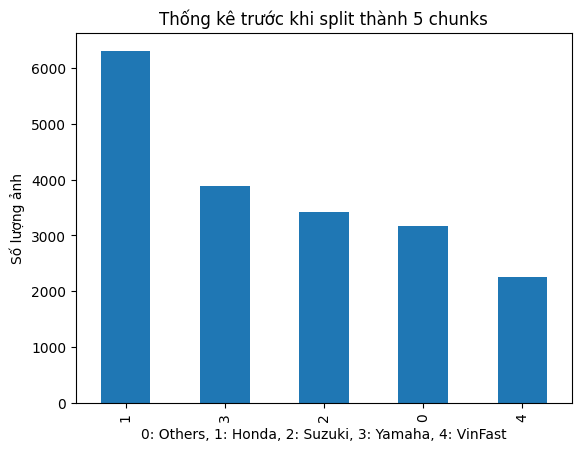

In [ ]:
item_counts = df['CategoryID'].value_counts()

# Bước 3: Visualize số lượng đối tượng của mỗi class
item_counts.plot(kind='bar')
plt.title('Thống kê trước khi split thành 5 chunks')
plt.xlabel('0: Others, 1: Honda, 2: Suzuki, 3: Yamaha, 4: VinFast')
plt.ylabel('Số lượng ảnh')
plt.show()

## Folds là array của 5 chunks
## Mỗi chunk sẽ là 1 cặp DATAFRAME train,test

In [ ]:
folds = generate_df_folds(df)
print(len(folds))
folds

5


[(                                          ImageFullPath  CategoryID
  0      Others/22520896-22520926-22521627.Others.130.jpg           0
  1      Others/22520896-22520926-22521627.Others.133.jpg           0
  2      Others/22520896-22520926-22521627.Others.341.jpg           0
  3      Others/22520896-22520926-22521627.Others.280.jpg           0
  4       Others/22520896-22520926-22521627.Others.59.jpg           0
  ...                                                 ...         ...
  15235          VinFast/21521007-21522629.Vinfast.27.jpg           4
  15236          VinFast/21521007-21522629.Vinfast.28.jpg           4
  15237          VinFast/21521007-21522629.Vinfast.29.jpg           4
  15238          VinFast/21521007-21522629.Vinfast.31.jpg           4
  15239          VinFast/21521007-21522629.Vinfast.32.jpg           4
  
  [15240 rows x 2 columns],
                                           ImageFullPath  CategoryID
  0      Others/22520896-22520926-22521627.Others.55.jpg    

## execute hàm lưu theo format file csv

In [ ]:
save_df_folds(folds,
                  train_file_name_prefix='MotocycleDataset-Splits-',
                  train_file_name_suffix='-Train.csv',
                  test_file_name_prefix='MotocycleDataset-Splits-',
                  test_file_name_suffix='-Test.csv')

In [ ]:
import matplotlib.lines as lines

## Đọc các file CSV đã lưu!!!

In [ ]:
def read_and_view_saved_csv(
                  train_file_name_prefix='MotocycleDataset-Splits-',
                  train_file_name_suffix='-Train.csv',
                  test_file_name_prefix='MotocycleDataset-Splits-',
                  test_file_name_suffix='-Test.csv'):
    for i in range(1,6):
      ### FILE NAME Ở ĐÂY
      train_file_name = f'{train_file_name_prefix}{i}{train_file_name_suffix}'
      test_file_name = f'{test_file_name_prefix}{i}{test_file_name_suffix}'
      ### HẾT FILE NAME

      ###ĐOẠN NÀY CHỈ IN TITLE
      fig_title = plt.figure(figsize=(10, 1))
      plt.text(0.5, 0.5, f'loading:{train_file_name} và {test_file_name}',
              horizontalalignment='center', verticalalignment='center',
              fontsize=28, weight='bold')
      plt.axis('off')
      plt.show()
      #### HẾT IN TITLE

      ### LOAD FILE RA DATAFRAME, FILE NAME CHẮC CHẮN THEO THỨ TỰ & FORMAT RỒI
      df_train = pd.read_csv(train_file_name)
      df_test = pd.read_csv(test_file_name)
      ### HẾT LOAD FILE NAME

      # get value counts để view lên plt, VALUE NÀY CỦA TRAIN
      train_value_counts = df_train['CategoryID'].value_counts()
      test_value_counts = df_test['CategoryID'].value_counts()
      #HÊT ĐOẠN GET VALUE

      ### CREATE 1 CÁI PLOT
      ### SHOW BAR CHART DF_TRAIN - PIE CHART DF_TRAIN - BAR CHART DF_TEST - PIE CHART DF_TEST
      fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
      train_value_counts.plot(kind='bar', ax=axes[0], title=f'Thống kê train {i} ')
      axes[0].set_xlabel('Category')
      axes[0].set_ylabel('Count')

      train_value_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', title=f'Fold {i} Train portions')
      axes[1].set_ylabel('')

      test_value_counts.plot(kind='bar', ax=axes[2], title=f'Thống kê test {i} ')
      axes[2].set_xlabel('Category')
      axes[2].set_ylabel('Count')

      test_value_counts.plot(kind='pie', ax=axes[3], autopct='%1.1f%%', title=f'Fold {i} Test portions')
      axes[3].set_ylabel('')

      #CHỈNH LAYOUT & SHOW
      plt.tight_layout()
      plt.show()


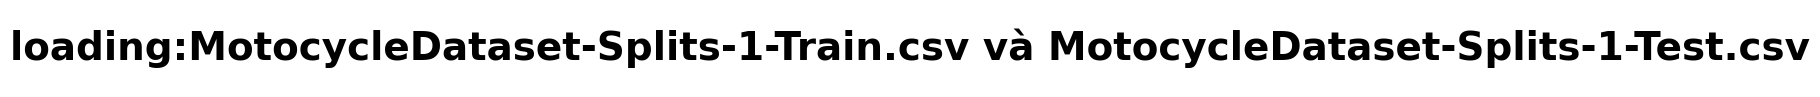

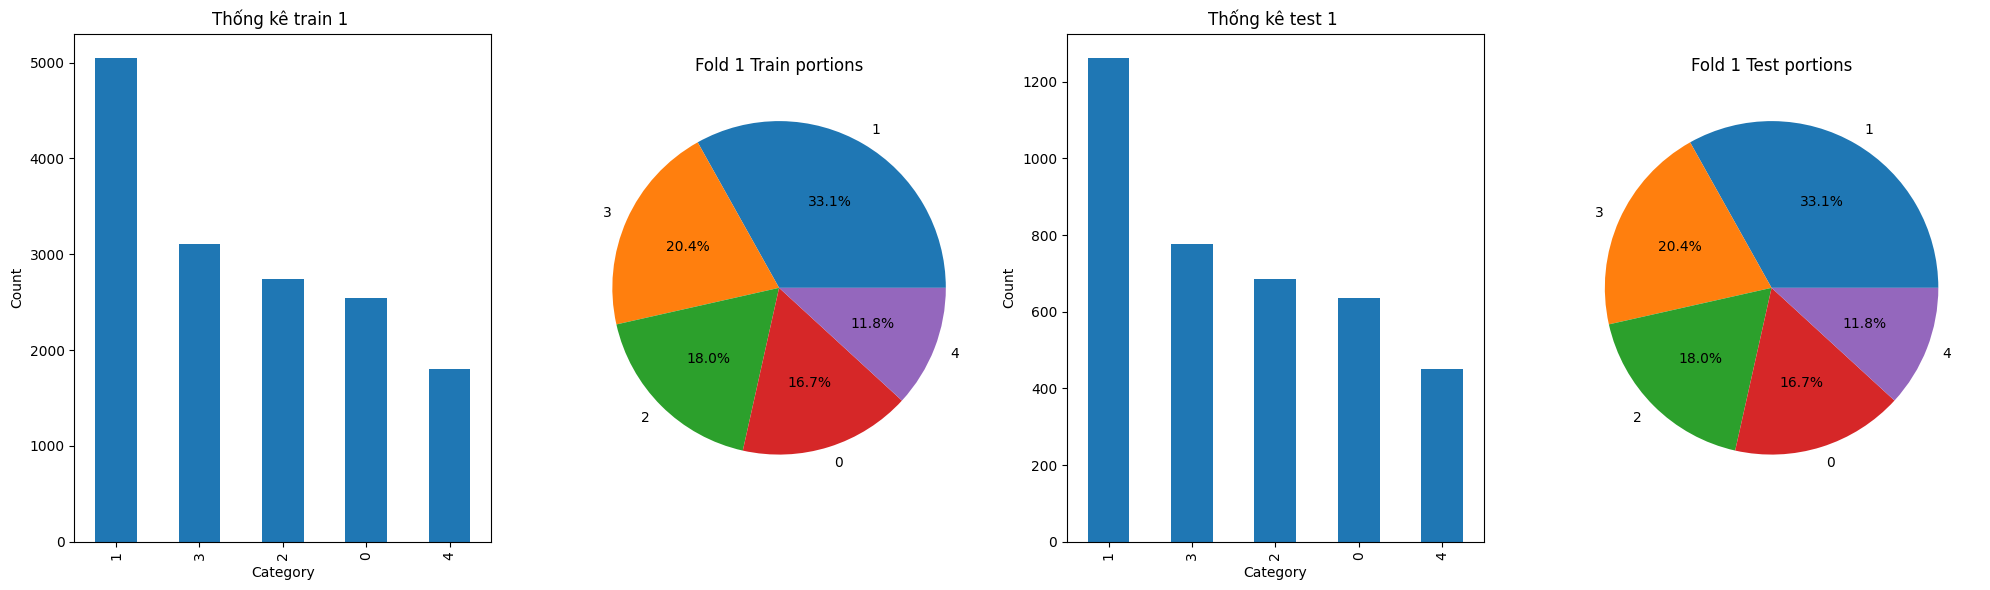

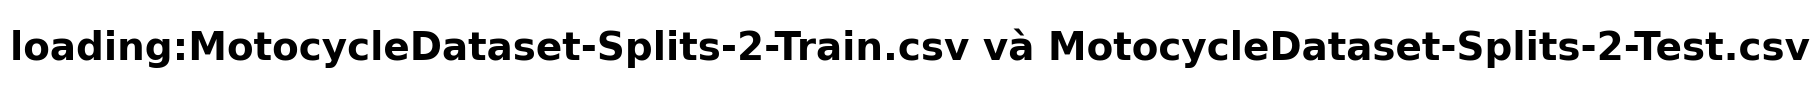

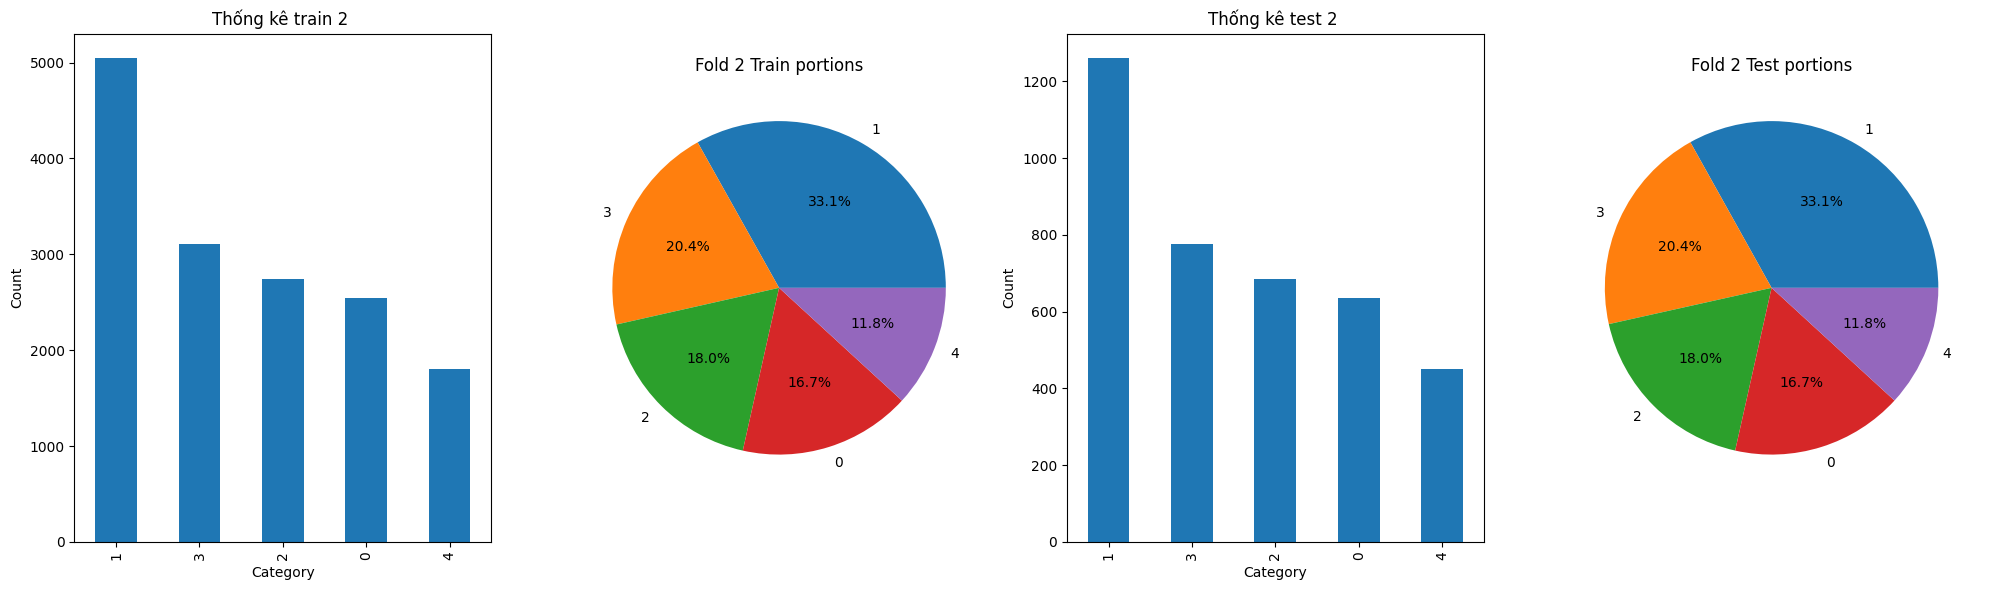

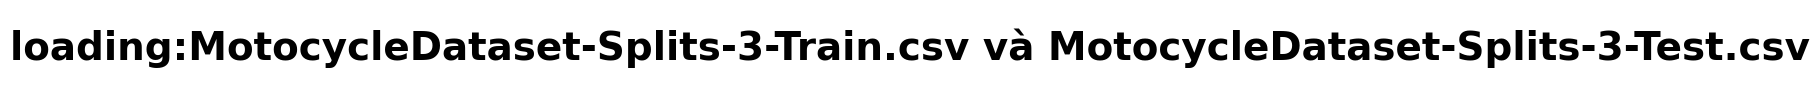

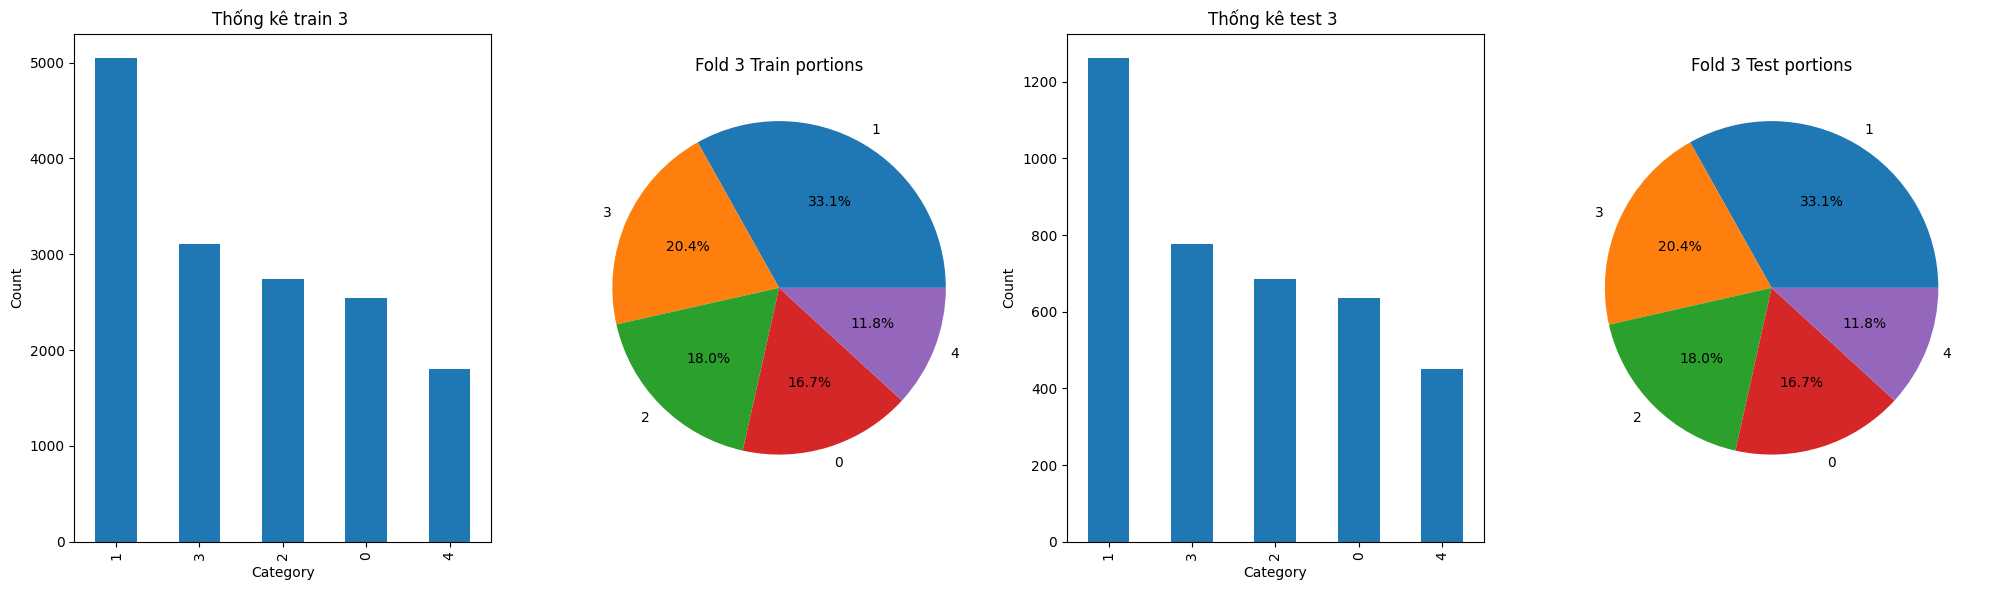

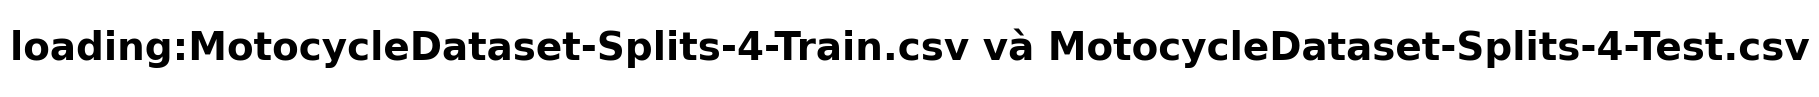

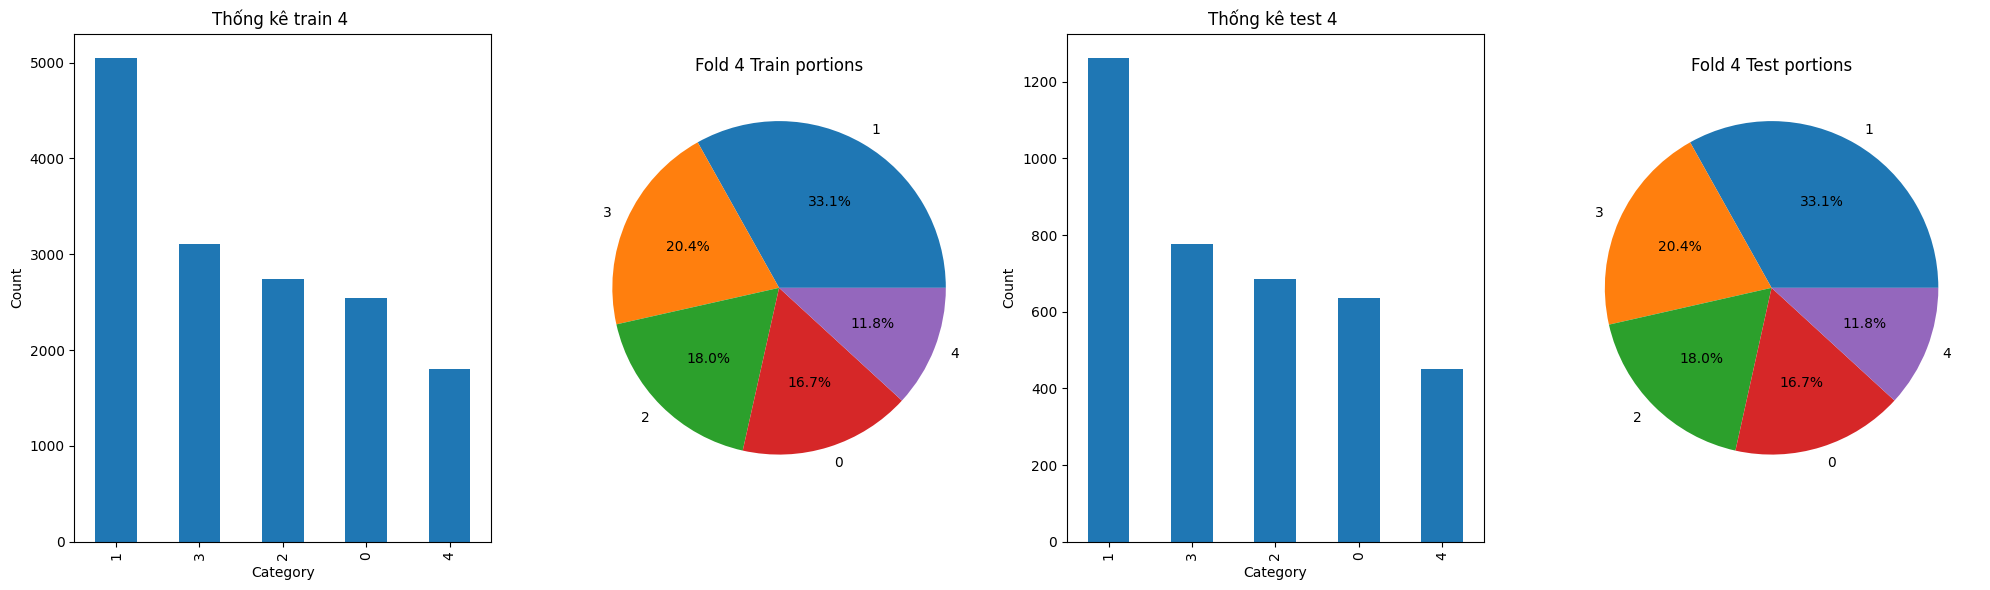

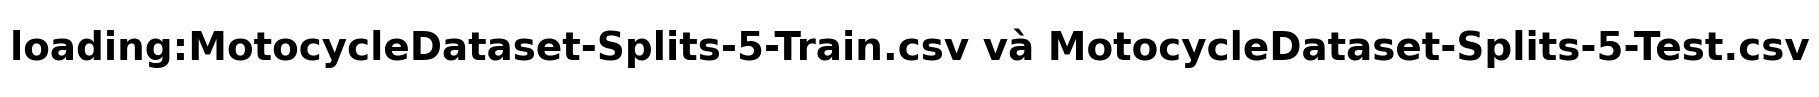

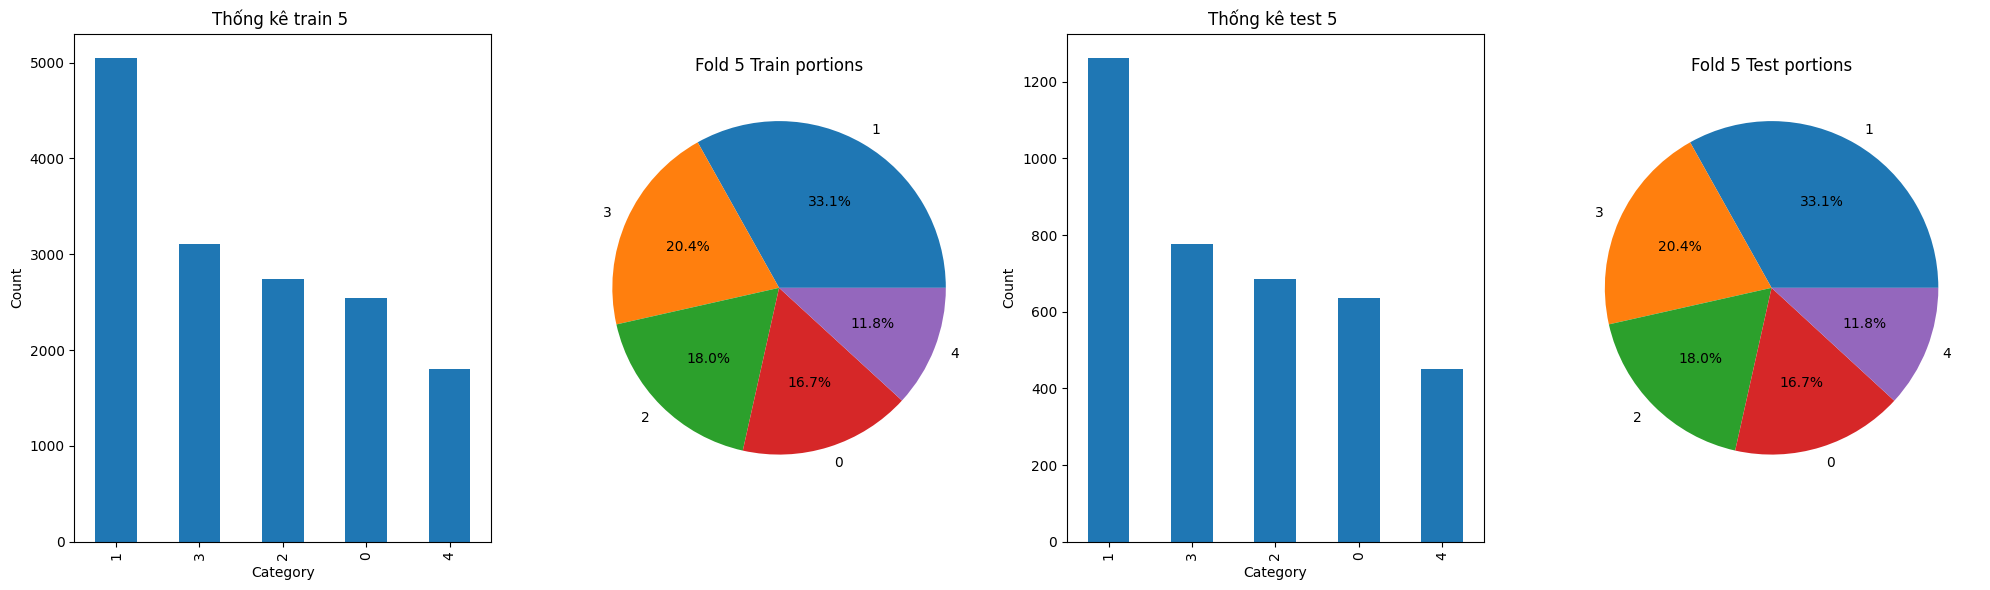

In [ ]:
read_and_view_saved_csv(
                  train_file_name_prefix='MotocycleDataset-Splits-',
                  train_file_name_suffix='-Train.csv',
                  test_file_name_prefix='MotocycleDataset-Splits-',
                  test_file_name_suffix='-Test.csv')